In [114]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [115]:
#! conda install seaborn

In [116]:
df_raw = pd.read_csv("../data/train.csv")

df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
df_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Pre-process data

1. fill in missing values: 
    - cabin with "unknown"
    - age with 

In [119]:
# create a copy to manipulate
df = df_raw.copy()

In [120]:
# need this to be able to import processor module
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))

In [121]:
import preprocess as pp

df = pp.infer_cabin_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,CabinNo,MultiCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,unknown,unknown,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,single
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,unknown,unknown,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,single
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,unknown,unknown,unknown


In [122]:
df[['LastName','FirstName']] = df.Name.str.split(',', expand=True)

# Visualize what we've got here...

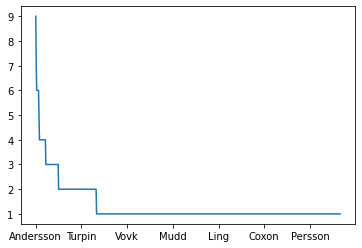

In [123]:
# frequency of last names 
df.LastName.value_counts().plot();

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


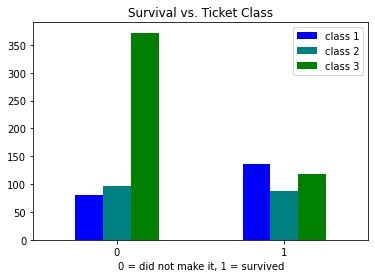

In [124]:
# Ticket Class  vs survival 
pd.crosstab(df.Survived, df.Pclass).plot(kind="bar", color=["blue", "teal", "green"], figsize=(6,4))

plt.title("Survival vs. Ticket Class")
plt.xlabel("0 = did not make it, 1 = survived")
plt.legend(["class 1", "class 2", "class 3"])
plt.xticks(rotation=0);

pd.crosstab(df.Survived, df.Pclass)

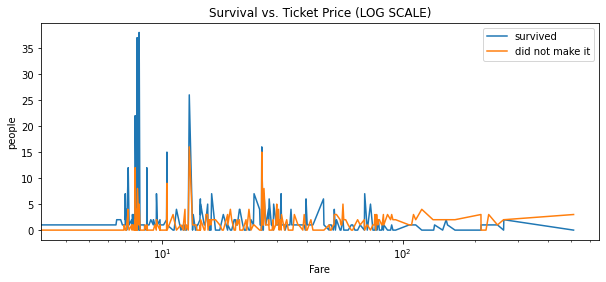

In [125]:
# Ticket Class  vs survival 
from matplotlib.pyplot import xscale
from sklearn.preprocessing import scale


pd.crosstab(df.Fare, df.Survived).plot( figsize=(10,4))

plt.title("Survival vs. Ticket Price (LOG SCALE)")
plt.xlabel("Fare")
plt.ylabel("people")
plt.xscale("log")
plt.legend(["survived", "did not make it" ])
plt.xticks(rotation=0);

#pd.crosstab(df.Survived, df.Pclass)

Deck,A,B,B B,B B B,B B B B,C,C C,C C C,D,D D,E,F,F E,F G,G,T,unknown
Survived,,,,,,,,,,,,,,,,,
0,8,9,2,1,0,20,2,2,8,0,8,2,0,3,2,1,481
1,7,27,5,1,2,31,2,2,24,1,24,7,1,0,2,0,206


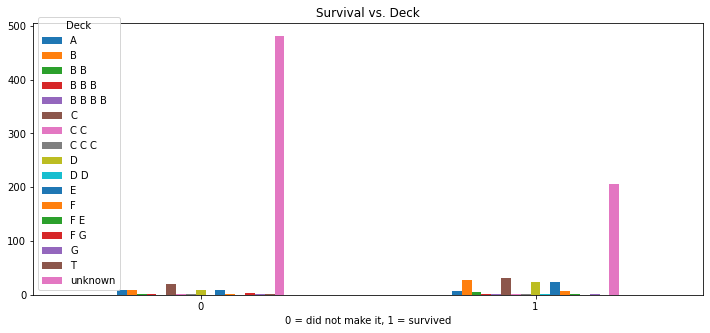

In [126]:
# Deck  vs survival 
pd.crosstab(df.Survived, df.Deck).plot(kind="bar", figsize=(12,5))

plt.title("Survival vs. Deck")
plt.xlabel("0 = did not make it, 1 = survived")
plt.xticks(rotation=0);

pd.crosstab(df.Survived, df.Deck)

Sex,female,male
Survived,,
0,81,468
1,233,109


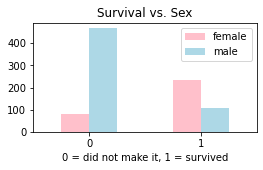

In [127]:
# Passenger sex vs. survival
pd.crosstab(df.Survived, df.Sex).plot(kind="bar", color=["pink", "lightblue"], figsize=(4,2))

plt.title("Survival vs. Sex")
plt.xlabel("0 = did not make it, 1 = survived")
plt.legend(["female", "male"])
plt.xticks(rotation=0);


pd.crosstab(df.Survived, df.Sex)

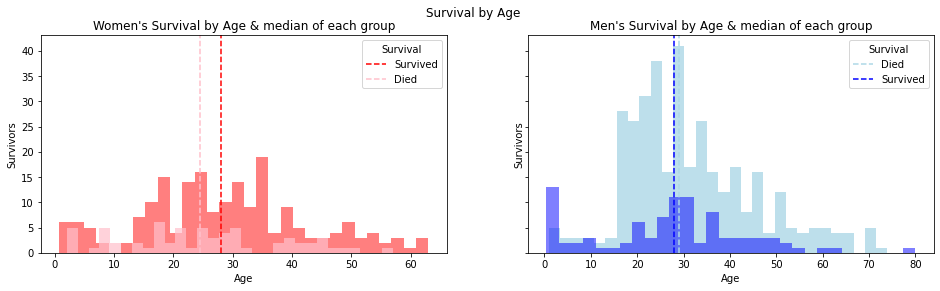

In [135]:
# Age  vs survival 

fig, ax = plt.subplots(figsize=(16,4), ncols=2, nrows=1, sharey=True)

women = df[df.Sex == 1]
men = df[df.Sex == 2]

fig.suptitle("Survival by Age")


ax[0].hist(women.Age[women.Survived==1], bins=30, alpha=.5, color="red")
ax[0].hist(women.Age[women.Survived==0], bins=30, alpha=.7, color="pink")
ax[0].axvline(women.Age[women.Survived==1].median(), linestyle="--", c="red")
ax[0].axvline(women.Age[women.Survived==0].median(), linestyle="--", c="pink")

ax[0].set(title="Women's Survival by Age & median of each group", 
      xlabel="Age",
      ylabel="Survivors")

ax[0].legend(["Survived", "Died"], title="Survival");

ax[1].hist(men.Age[men.Survived==0], bins=30, alpha=.8, color="lightblue")
ax[1].hist(men.Age[men.Survived==1], bins=30, alpha=.5, color="blue")
ax[1].axvline(men.Age[men.Survived==0].median(), linestyle="--", c="lightblue")
ax[1].axvline(men.Age[men.Survived==1].median(), linestyle="--", c="blue")

ax[1].set(title="Men's Survival by Age & median of each group", 
      xlabel="Age",
      ylabel="Survivors")

# add a legend
ax[1].legend(["Died", "Survived"], title="Survival");

# Age 

There are lots of missing values; trying to see if there's correlations with other things that might give us an idea as to how to fill it. 
This guy says to predict age with ML https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b 

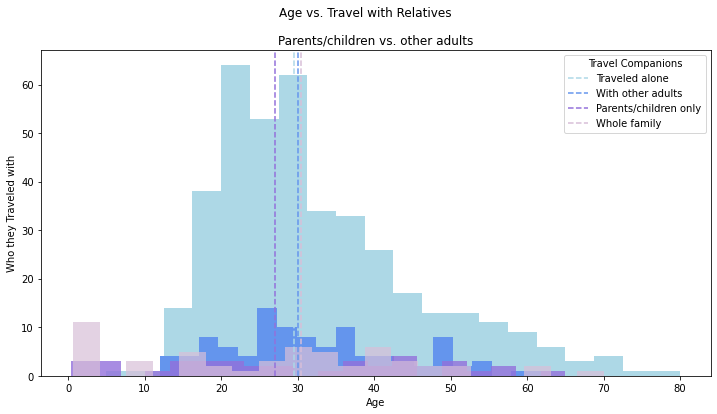

In [139]:
# age vs travel with relatives

fig, ax = plt.subplots(figsize=(12,6))

parch0 = df[df.Parch == 0]
parch1 = df[df.Parch == 1]

fig.suptitle("Age vs. Travel with Relatives")

ax.hist(parch0.Age[parch0.SibSp == 0], bins=20, color="lightblue") # alone
ax.hist(parch0.Age[parch0.SibSp == 1], bins=20, color="cornflowerblue") # with other adults
ax.hist(parch1.Age[parch1.SibSp == 0], bins=20, alpha=.8, color="mediumpurple") # parch
ax.hist(parch1.Age[parch1.SibSp == 1], bins=20, alpha=.7, color="thistle"); # parch + other adults


ax.axvline(parch0.Age[parch0.SibSp == 0].median(), linestyle="--", c="lightblue")
ax.axvline(parch0.Age[parch0.SibSp == 1].median(), linestyle="--", c="cornflowerblue")
ax.axvline(parch1.Age[parch1.SibSp == 0].median(), linestyle="--", c="mediumpurple")
ax.axvline(parch1.Age[parch1.SibSp == 1].median(), linestyle="--", c="thistle")

ax.set(title="Parents/children vs. other adults", 
      xlabel="Age",
      ylabel="Who they Traveled with")
ax.legend(["Traveled alone", "With other adults", "Parents/children only", "Whole family"], title="Travel Companions");


Age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,61.0,62.0,63.0,64.0,65.0,66.0,70.0,71.0,74.0,80.0
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,2,7,1,3,0,1,2,2,6,...,3,2,0,2,3,1,3,2,1,0
1,1,11,3,5,7,4,2,1,2,2,...,0,2,2,0,0,0,0,0,0,1


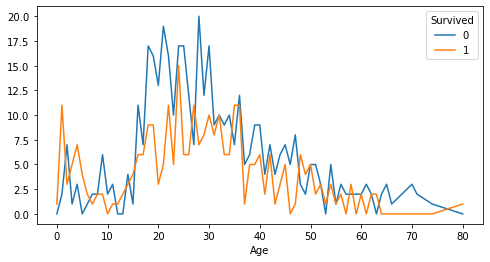

In [130]:
pd.crosstab(df.Age.round(), df.Survived).plot(figsize=(8,4));

pd.crosstab( df.Survived, df.Age.round())

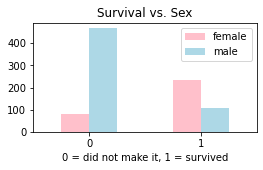

In [131]:

pd.crosstab(df.Survived, df.Sex).plot(kind="bar", color=["pink", "lightblue"], figsize=(4,2))

plt.title("Survival vs. Sex")
plt.xlabel("0 = did not make it, 1 = survived")
plt.legend(["female", "male"])
plt.xticks(rotation=0);


# Converting to numbers... 

looks like these columns are strictly categorical and can be conveted: 
- Sex
- Embarked 

These may have other patterns, but need more looking into: 
- name. e.g. some title may be associated with a safer location on the ship. but name has to be parsed to estract the title
- cabin. e.g. looking at the map of the ship and where it susteined damage first may be important. 
    - per https://www.encyclopedia-titanica.org/community/threads/about-cabin-numbers.1661/ the cabin signifies deck + room number. in some cases room numbers repeat!
    - inferring Deck value from cabin, that can be a categorical value too.

In [132]:
num_df = pp.numerify_categorical_columns(df, columns=["Sex", "Embarked", "Deck", "MultiCabin"])

PassengerId, not in col list
Survived, not in col list
Pclass, not in col list
Name, not in col list
converting Sex to category type
Age, not in col list
SibSp, not in col list
Parch, not in col list
Ticket, not in col list
Fare, not in col list
Cabin, not in col list
converting Embarked to category type
converting Deck to category type
CabinNo, not in col list
converting MultiCabin to category type
LastName, not in col list
FirstName, not in col list


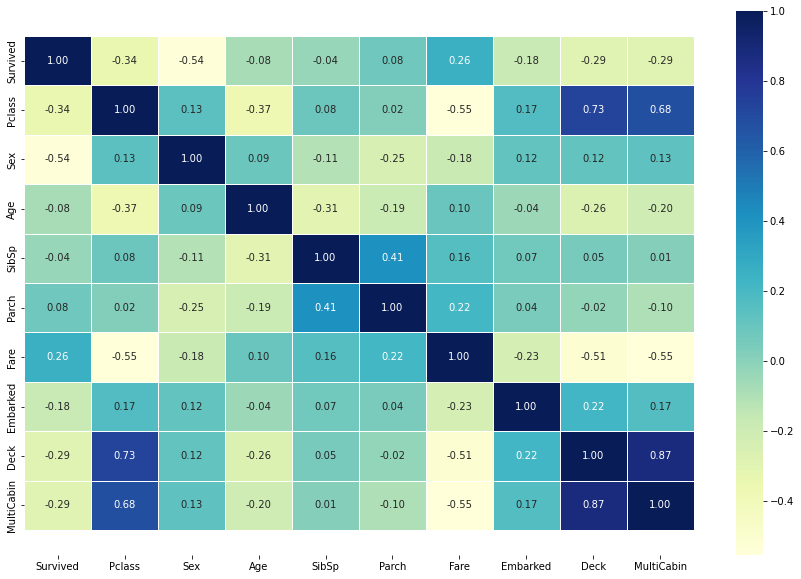

In [133]:
num_df = num_df.drop("PassengerId", axis=1) # the passenger ID isn't descriptive, so there's no need to correlate with it. 
corr_matrix = num_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5);

In [134]:
num_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,CabinNo,MultiCabin,LastName,FirstName
0,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,unknown,3,17,unknown,3,Braund,Mr. Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,6,85,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,unknown,3,17,unknown,3,Heikkinen,Miss. Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,6,123,2,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,unknown,3,17,unknown,3,Allen,Mr. William Henry
